In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/images/coca-cola-ad.jfif"
# original = Image.open(img_path).resize((513, 513))
# img_lbp = np.array(Image.open(img_path).resize((513, 513)).convert('L'))
# img_lbp = np.array(Image.open(img_path).resize((513, 513)))

original = Image.open(img_path).resize((512, 512))
img_lbp = np.array(original.convert('L'))
# img_lbp = np.array(Image.open(img_path).resize((512, 512)))

In [17]:
def lbp_3_3(matrix):
    # relative_positions = np.array([(0, 0), (1, 0), (2, 0), (0, 1), (2, 1), (0, 2), (1, 2), (2, 2)])
    relative_positions = np.array([(0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0)])
    h, w = matrix.shape

    # lbp = np.zeros((matrix.shape[0] // 3, matrix.shape[1] // 3), dtype='uint8')
    matrix_padded = np.pad(matrix, 1, mode='constant')
    lbp = np.zeros(matrix.shape, dtype='uint8')
    for lbp_y, idy in enumerate(range(0, h, 1)):
        for lbp_x, idx in enumerate(range(0, w, 1)):
            center_v = 0 # New value for the pivot
            real_positions = (idx, idy) + relative_positions
            # Get the values from the indices from the "real_position" and add all of them into one single value
            # cells_count = np.add.reduce(matrix[real_positions[:, 1], real_positions[:, 0]])
            pivot = matrix_padded[idy + 1, idx + 1]
            for n, (x, y) in enumerate(real_positions):
                if matrix_padded[y, x] >= pivot:
                    # matrix[y, x] = 255
                    center_v += np.power(2, n)
                # else:
                #     matrix[y, x] = 0
                    # center_v += 0

            # matrix[idy + 1, idx + 1] = 1 if int(number, 2) >= pivot else 0
            # matrix[idy + 1, idx + 1] = int(number, 2)
            # matrix[idy + 1, idx + 1] = center_v
            lbp[lbp_y, lbp_x] = center_v

    # return matrix
    return lbp


def lbp_2_2(matrix):
    relative_positions = np.array([(0, 1), (1, 1), (1, 0), (0, 0)])
    h, w = matrix.shape

    lbp = np.zeros((h // 2, w // 2), dtype='uint8')
    for lbp_y, idy in enumerate(range(0, h, 2)):
        for lbp_x, idx in enumerate(range(0, w, 2)):
            center_v = 0 # New value for the pivot
            real_positions = (idx, idy) + relative_positions
            # Get the values from the indices from the "real_position" and add all of them into one single value
            # cells_count = np.add.reduce(matrix[real_positions[:, 1], real_positions[:, 0]])
            pivot = (int(matrix[idy, idx]) + int(matrix[idy + 1, idx]) + int(matrix[idy + 1, idx + 1]) + int(matrix[idy, idx + 1])) // 4
            for n, (x, y) in enumerate(real_positions):
                # matrix[y, x] = matrix[y, x] + pivot // 2
                if matrix[y, x] >= pivot:
                    # matrix[y, x] = 255
                    center_v += np.power(2, n)
                # else:
                    # matrix[y, x] = 0

            lbp[lbp_y, lbp_x] = center_v

    return lbp


# lbp = np.zeros((img_lbp.shape[0] // 3, img_lbp.shape[1] // 3, 3), dtype="uint8")
# img_lbp_r = conv_b(img_lbp[:, :, 0])
# img_lbp_g = conv_b(img_lbp[:, :, 1])
# img_lbp_b = conv_b(img_lbp[:, :, 2])
# img_lbp_r = lbp_3_3(img_lbp[:, :, 0])
# img_lbp_g = lbp_3_3(img_lbp[:, :, 1])
# img_lbp_b = lbp_3_3(img_lbp[:, :, 2])

# lbp[:, :, 0] = img_lbp_r
# lbp[:, :, 1] = img_lbp_g
# lbp[:, :, 2] = img_lbp_b

lbp = lbp_3_3(img_lbp)
# lbp = lbp_2_2(img_lbp)

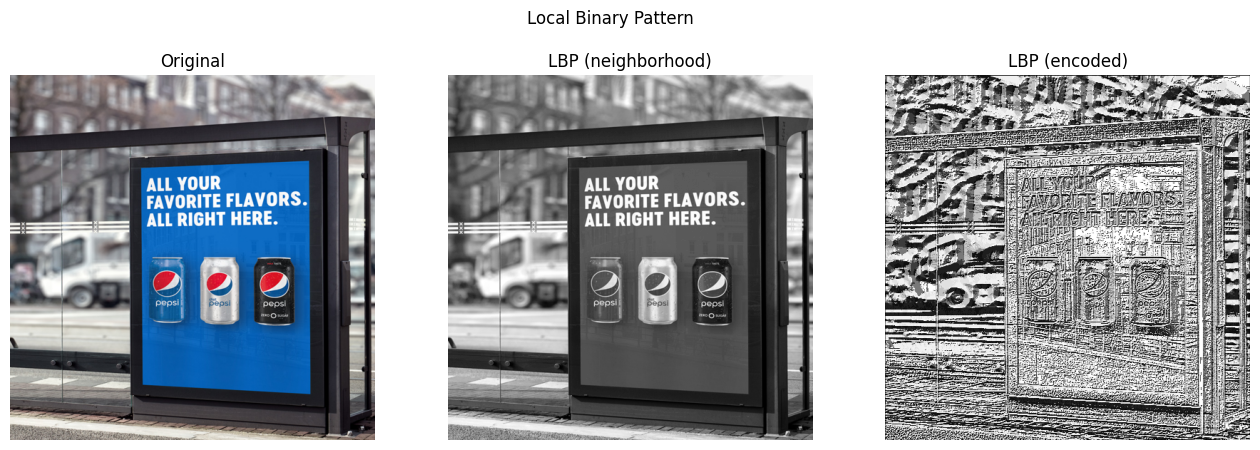

In [18]:
fig, axis = plt.subplots(1, 3, figsize=(16, 16))
fig.suptitle('Local Binary Pattern', y=0.65)

# # Display each image in a subplot
# for x, image, title, cfg in zip(axis, [img, img_lbp_r, img_lbp_g, img_lbp_b, img_lbp],
#                            ['Original', 'R', 'G', 'B', 'LBP'], ['viridis', 'gray', 'gray', 'gray', 'viridis']):
#     x.imshow(image, cmap=cfg)
#     x.axis('off') # Hide the axis
#     x.set_title(title) # Set title

to_show = [
    {
        'image': original,
        'title': 'Original',
        'color_conf': 'viridis',
    },
    {
        'image': img_lbp,
        'title': 'LBP (neighborhood)',
        'color_conf': 'gray',
    },
    {
        'image': lbp,
        'title': 'LBP (encoded)',
        'color_conf': 'gray',
    }
]

# Display each image in a subplot
for x, image in zip(axis, to_show):
    x.imshow(image['image'], cmap=image['color_conf'])
    x.axis('off') # Hide the axis
    x.set_title(image['title']) # Set title